## Week 3 Day 4: Graphs

In [1]:
%run "boaz_utils.ipynb"

# Graph connectivity

In [2]:
def neighbors(G,u):
    return G[u]

def isedge(G,u,v):
    return v in neighbors(G,u)

def vertices(G):
    return list(range(len(G)))

def addedge(G,i,j): 
    if not j in G[i]:
        G[i].append(j)
        
def emptygraph(n):
    return [[] for i in range(n)]

In [3]:
def undirect(G):
    U = emptygraph(len(G))
    for u in vertices(G):
        for v in neighbors(G, u):
            addedge(U, u, v)
            addedge(U, v, u)
    return U

In [4]:
def undir(G):
    U = [[] for i in vertices(G)]
    for i in vertices(G):
        for j in neighbors(G,i):
            addedge(U,i,j)
            addedge(U,j,i)
    return U

Given $i,j$ and a graph $G$: find out if $i$ has a path to $j$ (perhaps indirectly) in the graph

Here is a natural suggestion for a recursive algorithm:

$connected(i,j,G)$ is True if $i$ is a neighbor of $j$, and otherwise it is True if there is some neighbor $k$ of $i$ such that $k$ is connected to $j$. 

Let's code it up try to see what happens:

In [5]:
def connected(source, target, G):
    print(".",end="")
    if source == target:
        return True
    else:
        for k in neighbors(G, source):
            if connected(k, target, G):
                return True
        return False

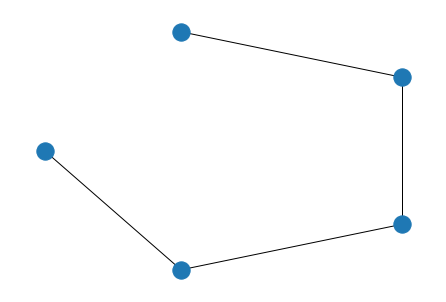

In [6]:
G = undir([[1],[2],[3],[4],[]])
draw_graph(G)

In [7]:
connected(0,1,G)

..

True

In [8]:
connected(0,2,G)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

RecursionError: maximum recursion depth exceeded while calling a Python object

In [ ]:
connected(0,3,G)

The problem is that we are getting into an infinite loop! 
We can fix this by remembering which vertices we visited.

In [32]:
def connected(source, target, G, visited = []):
    if not (source in visited):
        visited.append(source)
    if source == target:
        return True
    else:
        #print('variables are now')
        #print(str(source) + ' ' + str(target) + ' ' + str(visited))
        for k in neighbors(G, source):
            if not (k in visited):
                visited.append(k)
                if connected(k, target, G, visited):
                    return True
        return False
    

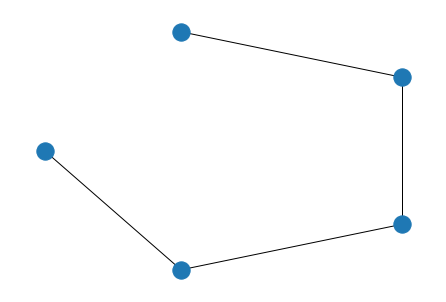

In [20]:
G = undir([[1],[2],[3],[4],[]])
draw_graph(G)

In [34]:
print(connected(0, 1, G, []))
#print('next one')
print(connected(0, 2, G, []))

True
True


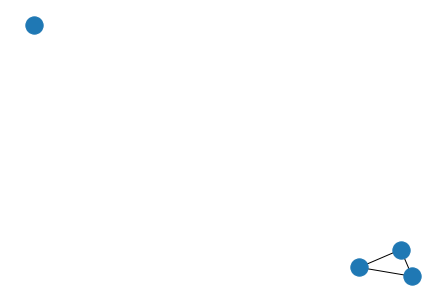

In [35]:
G = undir([[1],[2],[0],[]])
draw_graph(G)

In [36]:
print (connected(0,1,G) , connected(0,3,G))

True False


In [37]:
def make_grid(n): # return a n by n grid with an isolated vertex
    G = emptygraph(n*n)
    for i in range(n):
        for j in range(n):
            v = i*n+j
            if i<n-1: addedge(G,v,(i+1)*n+j)
            if j<n-1: addedge(G,v,i*n+j+1)
    G = undir(G)
    return G
 
def grid_input(n):
    return (0,n*n,make_grid(n)+[[]])

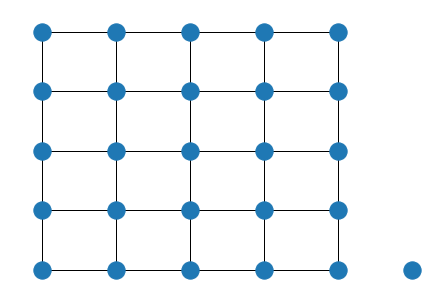

In [38]:
(s,t,G) = grid_input(5)
draw_graph(G, "grid_layout")

In [41]:
connected(0,1,G)

False

## Can speed up by changing how 'visited' works. Make it a length n list, where visited[u] is True if we ever visited vertex u and False otherwise

In [42]:
# DFS = Depth First Search
def search(u, G, visited):
    visited[u] = True
    for v in neighbors(G, u):
        if not visited[v]:
            search(v, G, visited)
    
def dfs(source, target, G):
    visited = [False]*len(G)
    search(source, G, visited)
    return visited[target]

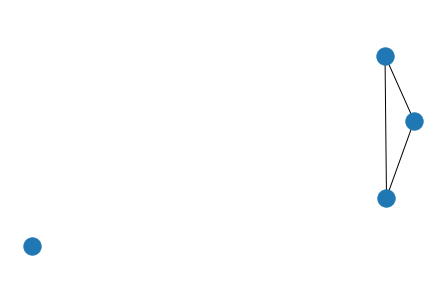

In [43]:
G = undir([[1],[2],[0],[]])
draw_graph(G)

In [44]:
print (dfs(0,1,G) , dfs(0,3,G))

True False


## What order does DFS visit vertices in this graph?

In [ ]:
G = undir([[1,4],[2],[3],[2],[0]])
draw_graph(G)

## Another algorithm for exploring graphs: Breadth First Search

In [49]:
# needs a queue
def create_queue():
    return [0, []]

def enqueue(Q, x):
    Q[1].append(x)
    
def dequeue(Q):
    ans = Q[1][Q[0]]
    Q[0] += 1
    return ans

def queue_size(Q):
    return len(Q[1]) - Q[0]

In [53]:
# return list of all distances from source to all other vertices
def bfs(source, G):
    visited = [False]*len(G)
    dist = [float('infinity')]*len(G)
    Q = create_queue()
    
    enqueue(Q, source)
    dist[source] = 0
    visited[source] = True
    
    while queue_size(Q) > 0:
        u = dequeue(Q)
        for v in neighbors(G, u):
            if not visited[v]:
                enqueue(Q, v)
                visited[v] = True
                dist[v] = dist[u] + 1
    
    return dist

In [ ]:
# breadth first search
def bfs(source, target, G):
    visited = [False]*len(G)
    Q = create_queue()
    
    enqueue(Q, source)
    visited[source] = 0
    
    while queue_size(Q) > 0:
        u = dequeue(Q)
        for v in neighbors(G, u):
            if not visited[v]:
                visited[v] = True
                enqueue(Q, v)
    
    return visited[target]

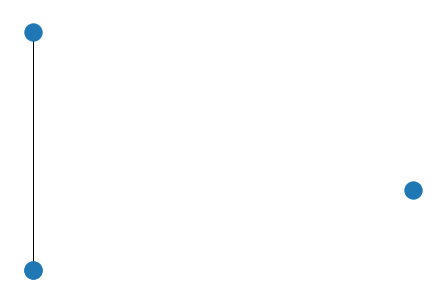

In [51]:
G = undir([[1],[2],[0],[]])
draw_graph(G)

In [54]:
print(bfs(0, G))

[0, 1, 1, inf]


## Can use Breadth First Search to find distances in graph

In [ ]:
# breadth first search
def bfs(source, G):
    visited = [False]*len(G)
    dist = [float('infinity')]*len(G)
    Q = create_queue()
    
    enqueue(Q, source)
    visited[source] = 0
    dist[source] = 0
    
    while queue_size(Q) > 0:
        u = dequeue(Q)
        for v in neighbors(G, u):
            if not visited[v]:
                dist[v] = dist[u] + 1
                visited[v] = True
                enqueue(Q, v)
    
    return dist

In [ ]:
bfs(0, G)